In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)


2.2.0-rc2


Using TensorFlow backend.


# FORWARD PASS

The obtained data is multiplied with weights (transposing weights for ease of calculation) using matrix multiplication. The data in this case is in shape (60000,784) which is multiplied with transposed weights in shape (784,10). This results in a matrix in shape (60000,10). Later this product is added to the bias which is in shape (1,10). Although the shapes aren’t same for addition operation, the result in shape (60000,10) is obtained. This is because of the broadcasting support of python. The broadcasting reshapes the bias to (60000,10) and performs addition. This result is known as inactivated value. This value is sent to an activation function which is softmax activation to introduce a non-linearity property to the function. An activation free neural network will not be able to mathematically execute these dynamic mappings and be able to overcome problems that the network needs to solve.
The softmax function generates a probability distributed vector which sums to 1. The formula used in softmax function is 

<center>$e^x/(e^x/(∑e^x ))$</center>


In [1]:
def forward_pass(data):
  # computing z = wx+b
    z = tf.matmul(data,tf.transpose(w)) + b
    # computing actiavted value
    a = softmax(z)
    return a

# CROSS ENTROPY LOSS
The cross-entropy loss is used to measure the performance of the model whose output are between 0 and 1. The function takes the predicted value and actual label as input. The input shapes are in (60000,10). The log values are found for the predicted values using tf.math.log function which results log values in shape (60000,10). Then these log values are multiplied with the actual labels and this product is reduced to sum of all the values column wise which results in shape (60000,1). The average loss is calculated by finding the mean of all the values and is returned.
 
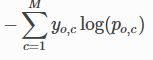

In [ ]:
# Defining cross entropy loss
def cross_entropy(pred, real):
    pred = tf.math.log(pred)
    pred = tf.cast(pred,tf.float64)
    # reducing sum for the product
    loss = tf.reduce_sum(tf.multiply(real,pred),axis=1)
    # finding average loss
    loss = tf.reduce_mean(loss)
    return -loss

# CALCULATE ACCURACY

This function takes predicted values and actual labels as input, computes accuracy of the model and outputs the accuracy. The inputs are in shape (60000,10). Since the predicted values are in matrix and the it is necessary to have a scalar value for comparison, the class with maximum probability is chosen. This is done using the argmax function which returns the index of maximum value in a given matrix. The argmax computes vertically, therefore the matrices are transposed and then used. The shape of the matrices after transpose is (10,60000) which is fed into argmax functions and is resulted in shape (1,60000). Later, an elementwise comparison is made between both predicted and actual values using tf.math.equal. This results in an array of Boolean values which is type-casted into decimal values. The total average of these values is found and returned to the model.

In [ ]:
def calculate_accuracy(pred,real):
    pred = tf.transpose(pred)
    real = tf.transpose(real)
    # finding the indices of maximum probability values
    pr = tf.math.argmax(pred)
    re = tf.math.argmax(real)
    # elementwise comparision between predicted and actual values
    acc = tf.cast(tf.math.equal(pr,re),dtype = tf.float64)
    acc = tf.math.reduce_mean(acc)
    return acc

# SOFTMAX

The softmax function generates a probability distributed vector which sums to 1. The formula used in softmax function is   

<center>$e^x/(e^x/(∑e^x ))$</center>

In [ ]:
# Defining the softmax function
def softmax(s):
    exps = tf.math.exp(s)
    return exps/tf.math.reduce_sum(exps,axis=1,keepdims=True)

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)

# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)


# one hot encode the training labels and get the transpose
tr_y = np_utils.to_categorical(tr_y,10)
# tr_y = tr_y.T
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y = np_utils.to_categorical(te_y,10)
# te_y = te_y.T
print ("Shape of testing labels ", te_y.shape)

neurons = 10
input_dim = tr_x.shape[1]
output_dim = tr_y.shape[1]

# initializing all weights and bias
w = tf.random.normal((neurons,input_dim),dtype=tf.dtypes.float64,mean=0.0, stddev=0.05)
w = tf.Variable(w,trainable = True)
b = tf.zeros([1, neurons], tf.float64) 
b = tf.Variable(b,trainable = True)

# using adam optimizer for gradient update.
adam = tf.keras.optimizers.Adam()
epochs = 100
tr_p =[]
tr_loss = []
te_p = []
te_loss = []
for i in range(epochs):
    with tf.GradientTape(persistent=True) as tape:
      # predicting the values
        y_pred = forward_pass(tr_x)
      # computing loss
        loss=cross_entropy(y_pred,tr_y)
# computing accuracy
    train_acc = calculate_accuracy(y_pred,tr_y)
    tr_loss.append(loss.numpy())
    tr_p.append(train_acc.numpy())
    # updating weights and bais using gradient descent rule
    gradients=tape.gradient(loss,[w,b])
    adam.apply_gradients(grads_and_vars=zip(gradients,[w,b]))


    y_test_pred = forward_pass(te_x)
    test_loss = cross_entropy(y_test_pred,te_y)
    te_loss.append(test_loss.numpy())
    test_acc = calculate_accuracy(y_test_pred,te_y)
    te_p.append(test_acc.numpy())
    
print("Train Accuracy:  " , train_acc)
print("Test Accuracy:  " , test_acc)






4423680/4422102 [==============================] - 0s 0us/step
Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (60000, 10)
Shape of testing labels  (10000, 10)
Train Accuracy:   tf.Tensor(0.77615, shape=(), dtype=float64)
Test Accuracy:   tf.Tensor(0.7663, shape=(), dtype=float64)


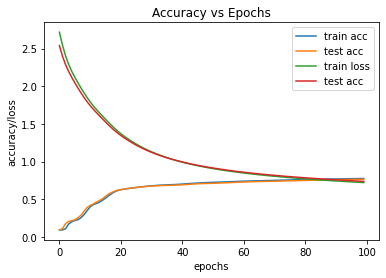

In [0]:
plt.plot(range(epochs),tr_p,label = "train acc")
plt.plot(range(epochs),te_p,label = "test acc")
plt.plot(range(epochs),tr_loss,label = "train loss")
plt.plot(range(epochs),te_loss,label = "test acc")
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()
